<h1>PHY 2200 - Computational Physics</h1>
<h2>Spring 2023</h2>

<h2>Introduction to numerical integration</h2>

In [77]:
import numpy as np
from matplotlib import pyplot as plt

To explore any kind of interesting physics, one must expect to be confronted by mathematical expressions involving <b>calculus</b>. Much of physics concerns continuously changing quantities, and that means we're going to have to deal with derivatives and integrals. For example, the dynamical law at the heart of classical mechanics is <b>Newton's second law</b> (a.k.a. the <i>momentum principle</i>)

$$\frac{d{\bf p}}{dt} = {\bf F}_{net}$$

Here ${\bf p} = m{\bf v}$ is the object's (a "point particle") <b>momentum</b> in terms of its mass $m$ and velocity ${\bf v} = \frac{d{\bf r}}{dt}$. The quantity ${\bf F}_{net}$ represents the net force on the object. This is a <b>vector</b> equation meaning that it's shorthand for three individual equations for each of the three components of position, ${\bf r} = x\hat{\bf x} + y\hat{\bf y} + z\hat{\bf z}$,

$$\frac{dp_{x}}{dt} = F_{x,net}$$

$$\frac{dp_{y}}{dt} = F_{y,net}$$

$$\frac{dp_{z}}{dt} = F_{z,net}$$

In introductory courses, one typically encounters simple cases (e.g., constant forces) in which the derivative can be written in terms of changes $\frac{d{\bf p}}{dt} \rightarrow \frac{\Delta {\bf p}}{\Delta t}$. Furthermore, even in cases where ${\bf F}_{net}$ is not a constant, one look at very small intervals of time $\Delta t$ over which the force is <i>approximately</i> constant to write

$$\frac{\Delta {\bf p}}{\Delta t} \approx {\bf F}_{net},$$

where $\Delta {\bf p} = {\bf p}(t + \Delta t) - {\bf p}(t)$. That is,

$${\bf p}(t + \Delta t) \approx {\bf p}(t) + \Delta t {\bf F}_{net}$$

Since ${\bf p} = m\frac{\Delta {\bf r}}{\Delta t}$, we can say

$${\bf r}(t + \Delta t) \approx {\bf r}(t) + \Delta t {\bf p}(t+\Delta t)/m$$

In the last step, we had a choice to make: should ${\bf p}(t+\Delta t)$ or ${\bf p}(t)$ appear? The goal would be to choose $\Delta t$ so small that ${\bf p}(t) \approx {\bf p}(t+ \Delta t)$ and it shouldn't really matter. Surprisingly, we get a much more stable algorithm (the Euler-Cromer, or "leapfrog" method) by taking ${\bf p}(t+ \Delta t)$. I don't think that's at all obvious. But it's true.

To summarize, we can take Newton's second law which depends on a derivative and turn it into an updating procedure to calculate how an object's position and momentum change due to a specificed force ${\bf F}_{net}$ as follows:

$${\bf v}(t + \Delta t) \approx {\bf v}(t) + \Delta t {\bf F}_{net}/m$$

$${\bf r}(t + \Delta t) \approx {\bf r}(t) + \Delta t {\bf v}(t+\Delta t)$$

Given some <b>initial conditions</b>, ${\bf r}(0)$ and ${\bf v}(0)$ (i.e., where it is and how fast it's moving at that time), we can compute where it is and how fast it's moving at any later time. What we have just done is to take a mathematical problem involving calculus and translated it into an algorithm for an approximate solution which can be obtained by a computer. Let's see how this works with a simple example.

<h2>Linear restoring force</h2>

Consider the one-dimensional case of ${\bf F}_{net} = - kx \hat{\bf x}$, where $k$ is some constant. Motion in the $x$ direction is then described by

$$\frac{d p_{x}}{dt} = m \frac{dv_{x}}{dt} = -kx$$

Physically, this force points toward the origin (the minus sign) and gets stronger the farther the object is from the origin. It's a simple model for a mass attached to an ideal spring, but this model actually describes an incredible number of natural phenomena as we'll see during this course. The fancy name for this model that you can use to impress your friends is the <b>simple harmonic oscillator</b>.

Let's suppose we start the object at an initial displacement $x(0) = x_{0}$ at rest ($v_{x}(0) = 0$). Then all we need to do is define a time step $\Delta t$, initialize arrays to store the values of $x(t)$ and $v_{x}(t)$, and apply the updating steps inside of a loop:

In [78]:
x0 = 1.0
v0 = 0.0

m = 1.0
k = 1.0

dt = 0.05
N = 100
t = np.linspace(0,(N-1)*dt,N)

x = np.zeros(N)
vx = np.zeros(N)

x[0] = x0
vx[0] = v0

for i in range(0,N-1):
    F = -k*x[i]
    vx[i+1] = vx[i] + dt*F
    x[i+1] = x[i] + dt*vx[i+1]

And that's it. Let's make a plot to see what happened:

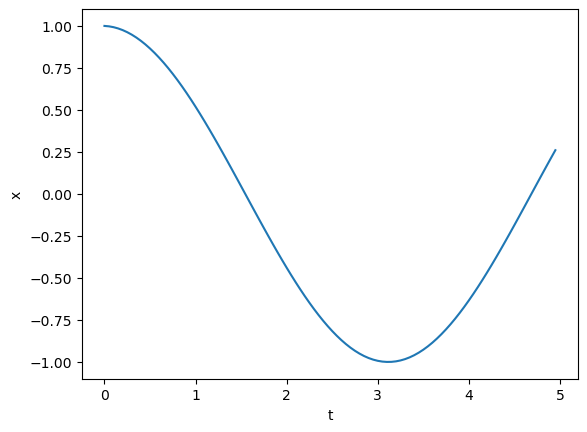

In [79]:
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In words, the mass is displaced from the origin. Due to the restoring force, it is pulled back toward the origin, gaining speed as it moves. Once it hits the origin, it's now moving and overshoots. Once crossing $x = 0$, the force now flips directions and begins to slow the object, ultimately turning it around and repeating the cycle in the other direction. This endless oscillation is known as <b>simple harmonic motion</b>. Before turning our attention to other types of differential equations, let us briefly explore the elephant in the room: all of this was based on an approximate representation $\frac{d{\bf p}}{dt} \approx \frac{\Delta {\bf p}}{\Delta t}$. How do we know if it's accurate?

In this simple case, there is an exact solution available. Namely, one can use calculus (take PHY 3110 to learn how to do this; it's fun!) to show

$$x(t) = x_{0}\cos\left(\sqrt{\frac{k}{m}}t\right)$$

So one thing to do is just compare the exact solution to the approximate one:

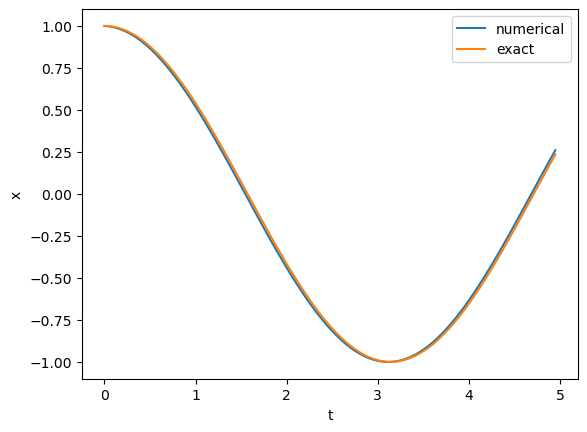

In [80]:
xe = x0*np.cos(np.sqrt(k/m)*t)

plt.plot(t,x)
plt.plot(t,xe)
plt.xlabel('t')
plt.ylabel('x')
plt.legend(['numerical','exact'])
plt.show()

It is tempting to say, "oh, well they're <i>pretty</i> close but not exact" and go on to do other things with our day. But to apply these methods in a controlable way, we should look a little more carefully. When comparing two quantities that are "close," what we're really interested in is the difference between them. That's easy enough to plot. Since we don't really care which one is bigger (but only by <i>how much</i> they differ), we might as well plot the magnitude of the difference.

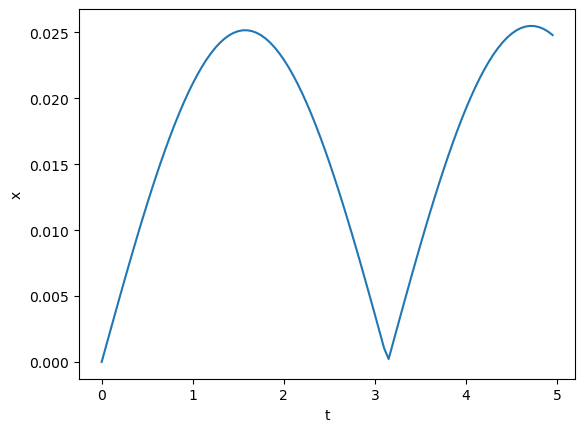

In [81]:
plt.plot(t,np.abs(x-xe))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

And here is the dark truth behind numerical methods: there are always errors, and they generally get larger as the calculation churns along. This isn't an unreasonable claim. If each step produces a small error and you're feeding in a result into the next step, these errors will generally compound. It is the duty of the computational physicist to be aware of these errors and control for them where possible. 

But we're only able to see the error above because we have the exact solution. If that's the case, why bother with the approximate, computational approach? And what does one do when the exact solution isn't available so that computation is the only viable path? 

To address the first concern, exactly solvable models are <i>useful</i> because they do allow us to benchmark the errors associated with various schemes. For example, we chose to take time steps of size $\Delta t = 0.1$. The first peak in the error curve hits around $0.05$. Try reducing `dt` by a factor of two. Try <i>increasing</i> it by a factor of two. What happens to the size of the first peak? 

If you try a few different values of `dt`, you should be able to convince yourself that the error <i>scales</i> as $\Delta t$. If you double $\Delta t$, you double the error. If you reduce it by a factor of ten, your error is reduced by the same factor. In other words, $\mbox{error } \propto \Delta t$. For this reason, we say this scheme creates error "of order $\Delta t$", or in mathematical notation $\mathcal{O}(\Delta t)$. That's not great, but it's at least controlable in principle: try your calculation with some choice of $\Delta t$. Then try reducing $\Delta t$ and see if anything changes significantly (and you get to define "significantly" here). Once the changes become negligible to you, you have a healthy approximate computation.

One problem arises: suppose you want to compute ${\bf r}(t)$ by cutting $t$ into $N$ steps of size $\Delta t$. Reducing $\Delta t$ increases the number of steps $N$ needed to get to $t$. It <i>might</i> be that in order to reduce the error sufficiently, you need an <i>impractically</i> large number of steps. For this reason, <b>higher-order schemes</b> which generate errors as $\mathcal{O}(\Delta t^{2})$ or $\mathcal{O}(\Delta t^{4})$ are highly desirable. For small $\Delta t = 0.1$, $\Delta t^{2}=0.01$ is smaller and $\Delta t^{4} = 10^{-4}$ is smaller still. We will introduce higher order methods shortly. 

But let us also revisit the strange choice we made in writing the momentum principle. Our leap-frog algorithm looks like

$$v_{x}(t + \Delta t) \approx v_{x}(t) + \Delta t F_{net}$$
$$x(t+\Delta t) \approx x(t) + \Delta t v_{x}(t + \Delta t)$$

We <i>first</i> update $v_{x}$ and then use that new value to update $x(t)$. What happens if we use $v_{x}(t)$ in the second line? This scheme is known as the <b>forward-Euler</b> method. Let's explore this for the harmonic oscillator by repeating the calculation using arrays `x1` and `vx1` in place of `x` and `vx`:

In [82]:
x1 = np.zeros(N)
vx1 = np.zeros(N)

x1[0] = x0
vx1[0] = v0

for i in range(0,N-1):
    F = -k*x1[i]
    vx1[i+1] = vx1[i] + dt*F
    x1[i+1] = x1[i] + dt*vx1[i]

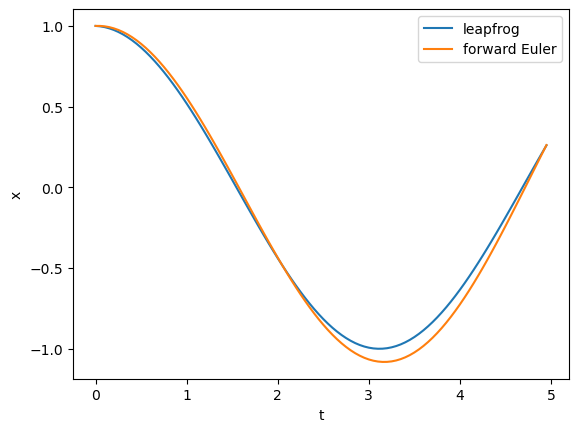

In [83]:
plt.plot(t,x)
plt.plot(t,x1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend(['leapfrog','forward Euler'])
plt.show()

It's true that both schemes should be equivalent as $\Delta t\rightarrow 0$, but there's a dramatic distance in the results depending on that tiny choice of using `vx[i+1]` or `vx[i]` when updating the position. What's worse is that the forward-Euler method is actually <i>unstable</i>. There is absolutely no reason to use it in this context. However, we will find certain equations that do not share the same structure as those resulting from Newton's laws. In some cases, it is possible to use forward-Euler to get decent results so long as the step size $\Delta t$ is taken sufficiently small.

<h2>Integrals</h2>

Take a step back from all this differential equation business. What we're doing is <i>integrating</i> the expression for $\frac{d{\bf p}}{dt}$ to obtain ${\bf p}$ (and then the expression for $\frac{d{\bf r}}{dt}$ to obtain ${\bf r}$). It might not seem like it with all the colorful terms, but all we're doing is performing an integral numerically. 

The great thing about performing integrals numerically is that it doesn't matter how many tricks about doing integrals you know. There are certain pathological functions, to be sure. But the simple-minded approach you'll explore here can get you quite far.

Suppose (for whatever reason) you want to evaluate 

$$I = \int_{a}^{b}f(x)dx$$

for some function $f(x)$ and end points, $a$, $b$. The <i>simplest</i>, if not most efficient, thing one could do is to sample $f(x)$ on some uniformly spaced points $x_{i}$ and then apply the "rectangle rule$

$$I \approx \sum_{i}f(x_{i})\Delta x$$

This can be generalized to uneven spacing and fancier interpolation (trapezoidal rule, Simpson's rule, etc.). But let's continue with the simplest possible thing we can do. For example, consider

$$I = \int_{0}^{1}x^{2}dx$$

That's not hard to evaluate ($I = \frac{1}{3}$), so it provides a nice test case:

In [84]:
N = 1000
x = np.linspace(0,1,N)
dx = x[1]-x[0] #calculate spacing dx

f = x**2

I = sum(x**2 * dx)
print('I = ',I)

I =  0.3338340008343345


Take a moment to vary `N`. For every factor of ten by which `N` increases, you should get another decimal place of accuracy in the result. This is quick and dirty. It's the "forward Euler" of doing integrals, but it has the benefit of not being unstable in this simpler setting. Many languages that contain build in integration (or "quadrature") routines are based on the fancier scheme known as <b>Gaussian quadrature</b>.

Again, the process is not incredibly helpful when it's easier to just get the exact answer analytically. But integrals are often <i>difficult</i>. Sometimes there are no closed-form answers. Here's a fun example that involves some slippery manipulations:

$$I_{1} = \int_{0}^{1}\left\{\frac{1}{x}\right\}dx$$

In this expression, the brackets $\left\{\cdot\right\}$ denote the <b>fractional part</b>. That is, you take out the whole number and the fractional part is whatever is left. So $\left\{3\right\} = 0$, $\left\{4.52\right\} = 0.52$. Take a moment to ponder how on Earth you would begin to evaluate something like this (or just check out this highly specialized [text](https://www.amazon.com/Limits-Fractional-Part-Integrals-Mathematical/dp/1461467616)).

We can make use of the <b>floor function</b> `np.floor()` to take the "whole" part of a number. That is, $\left\{a\right\} \rightarrow $ `a - np.floor(a)`. Then we can do the approximate integral as follows:

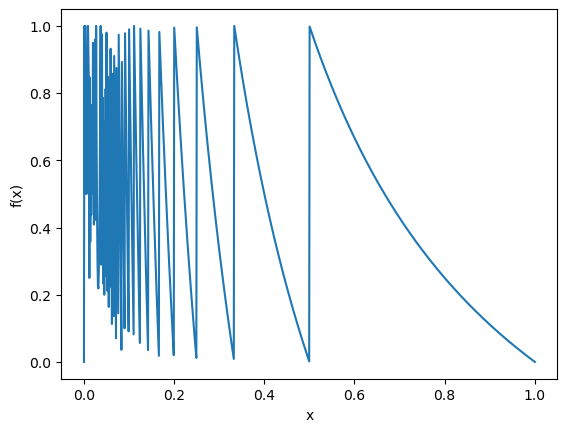

In [85]:
N = 1000
x = np.linspace(1e-10,1,N) #(0,1,N) presents a problem; can you see what it is?
dx = x[1]-x[0]
f = (x**(-1)) - np.floor(x**(-1))

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Look at that mess! The approximate integral can be obtained easily enough, but it's not clear if we've taken nearly enough sample points. Note also that instead of taking points from $0$ to $1$ we used $[\epsilon, 0]$ as the range where $\epsilon = 10^{-10}$. The integrand isn't defined precisely at zero, so we'll get an error if we include it. One way around this is to shift the left end point from zero to something <i>tiny</i>. How tiny? Depends on the problem. 

As for the integral itself:

In [86]:
sum(f*dx)

0.43141764397364585

It turns out that this integral can be evaluated exactly in terms of our old friend $\gamma = 0.577...$ (the Euler-Mascheroni constant)

$$\int_{0}^{1}\left\{\frac{1}{x}\right\}dx = 1-\gamma$$



Take a moment to adjust $N$ and see if you get the similar "nice" convergence that we saw in the simpler case:

In [87]:
γ = 0.577215664901532860606512090 #Thanks, Wikipedia! https://en.wikipedia.org/wiki/Euler%27s_constant

print('I = ',1-γ)

I =  0.42278433509846713


<h2>Exercises</h2>

<h3>1. Integrals</h3>

Try your hand at evaluating the following integrals numerically. Write functions that return the value of the definite integral as a function of the number of steps $N$. 

<h3>(a)</h3>

$$\int_{0}^{1}\left\{\frac{1}{x}\right\}^{2}dx = \ln 2\pi-\gamma - 1$$

In [88]:
def fracpart2(N):
    x = np.linspace(1e-10,1,N)
    dx = x[1]-x[0] #calculate spacing dx
    
    f = ((1/x)-np.floor(1/x))**2
    
    I = sum(f * dx)
    return I
    
    raise NotImplementedError()

fracpart2(1000)

0.26906827373606795

<h3>(b)</h3>

$$\int_{0}^{1}\left\{\frac{1}{x}\right\}\left\{\frac{1}{1-x}\right\}dx = 2\gamma-1$$

<i>Hint: </i> This integrand <i>also</i> blows up at $x = 1$. If you let $0\rightarrow \epsilon$ to get the other case to work, try letting $1\rightarrow 1-\epsilon$ here also.

In [89]:
def fracpart3(N):
    x=np.linspace(1e-300,1-10e-10,N)
    dx=x[1]-x[0]
    
    f=((1/x)-np.floor(1/x))*((1/(1-x))-np.floor(1/(1-x)))
    
    I = sum(f*dx)
    return I
    
    
    raise NotImplementedError()

fracpart3(1000)

0.1552333921495082

<h3>(c)</h3>

$$\int_{0}^{1}\left\{\frac{1}{x}\right\}^{2}\left\{\frac{1}{1-x}\right\}^{2}dx = 4\ln2\pi - 4\gamma-5$$

In [90]:
def fracpart4(N):
    x=np.linspace(1e-100,1-10e-10,N)
    dx=x[1]-x[0]
    
    f=(((1/x)-np.floor(1/x))**2)*(((1/(1-x))-np.floor(1/(1-x)))**2)
    
    I = sum(f*dx)
    return I

    raise NotImplementedError()

fracpart4(1000)

0.042787256579037425

<h3>2. Oscillator with linear damping</h3>

We have consider a harmonic oscillator in the absence of any friction, so the only force is given by the restoring force, ${\bf F}_{x,net} = -kx$. What happens when friction is added? A simple model of friction consists of a velocity-dependent, damping force $F_{damp} = -bv_{x}$ for some constant $b$. The effect of this force is to always point against the direction of motion, thereby always acting to reduce the object's speed.

Complete the following function to return the array of position values for a simple harmonic oscillator in the presence of weak, linear damping. Use Euler-Cromer/leapfrog.

In [91]:
'''
𝐯(𝑡+Δ𝑡)≈𝐯(𝑡)+Δ𝑡𝐅𝑛𝑒𝑡/𝑚

𝐫(𝑡+Δ𝑡)≈𝐫(𝑡)+Δ𝑡𝐯(𝑡+Δ𝑡)'''

def dampedsho(N,tmax,b,xo,vo):
    #user specifies N, tmax, b, xo, vo
    t = np.linspace(0,tmax,N)
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    x[0]=xo
    vx = np.zeros(N)
    vx[0]=vo
    
    for i in range(N-1):
#        F = -b*vx[i]
        vx[i+1] = vx[i] + dt*((-k*x[i])-(b*vx[i]))
        x[i+1] = x[i] + dt*vx[i+1]
        
    return x
    
    raise NotImplementedError()

Now make a plot to show how the position varies in time. You will have to manually build the appropriate time array if you wish to use actual time values in the plot (`plt.plot(x)` would also work). A good set of parameters might be `N=1000`, `tmax=30`, `b=0.25`, `xo = 1.0`, `vo = 0.0` but feel free to explore the parameter space.

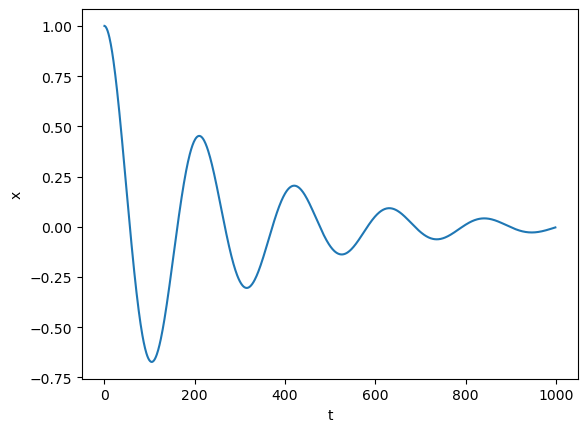

In [92]:
#x=dampedsho(1000,30,.25,1,0)
f = ((1/x)-np.floor(1/x))

plt.plot(dampedsho(1000,30,.25,1,0))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

# raise NotImplementedError()

<h3> 3. Sliding drag </h3>

Repeat the previous question for the case of <b>sliding drag</b>. Recall that sliding friction is a constant force (kinetic friction)

$$F_{k} = \mu n$$

where $\mu$ is the coefficient of friction and $n$ is the normal force. On a flat surface, $n = mg$ so we can just take this force to have constant magnitude $F_{k} = b$. What is important, however, is that the direction of the force always points against the instantaneous velocity. Think about how you can use the function `np.sign()` to incorporate this important property.

In [93]:
def dampedsho2(N,tmax,b,xo,vo):
    #user specifies N, tmax, b, xo, vo
    t = np.linspace(0,tmax,N)
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    x[0]=xo
    vx = np.zeros(N)
    vx[0]=vo
    
    for i in range(0,N-1):
#        F = -k*x[i]
#        Fdir = np.sign(vx[i])*-1
#        Fdamp = b*Fdir
#        Fnet = Fdamp+F
#        vx[i+1] = vx[i] + dt*Fnet
        vx[i+1] = vx[i] + dt*((b*(-np.sign(vx[i])))+(-k*x[i]))
#                              b *      Fdir            F
        x[i+1] = x[i] + dt*vx[i+1]
    
    return x
    
    raise NotImplementedError()

Make a plot to show how the position varies in time. Again, you will have to manually build the appropriate time array if you wish to use actual time values in the plot (`plt.plot(x)` would also work). A good set of parameters might be `N=1000`, `tmax=30`, `b=0.1`, `xo = 1.0`, `vo = 0.0` but feel free to explore the parameter space. Take `k=1` and `m=1` also.

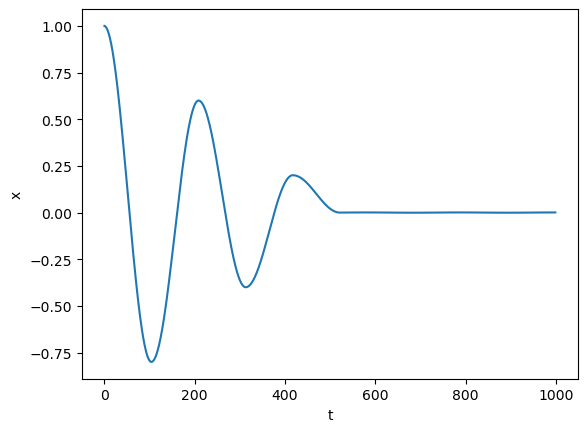

In [94]:
plt.plot(dampedsho2(1000,30,.1,1,0))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

# raise NotImplementedError()

<h3>4. The simple pendulum</h3>

Consider a mass $m$ attached to a thin rod of length $l$ which is suspended from a flat surface. When the mass of the rod is negligible compared to the mass of the "bob" this system is known as a <b>simple pendulum</b> (or <i>mathematical pendulum</i> for certain theorists).

<center>
    <img src="pendulum.png" width=200>
</center>

The "momentum principle" for this system is most conveniently written in terms of the angular coordinate $\theta$ and angular velocity $\omega$ (from $\theta$ and $l$ you can work out the $(x,y)$ position of the bob using basic trigonometry, so there's only <i>one</i> "degree of freedom").

$$\frac{d\omega}{dt} = -\frac{g}{l}\sin\theta$$
$$\frac{d\theta}{dt} = \omega$$

Aside from using Greek letters $(\theta,\omega)$ instead of $(x,v_{x})$, this is structurally quite similar to the equations of motion simple harmonic oscillator

$$\frac{dv_{x}}{dt} = -\frac{k}{m}x$$
$$\frac{dx}{dt} = v_{x}$$

The only real difference is that we have $\sin\theta$ (a nonlinear function) in place of $x$ (linear dependence). This makes the pendulum <i>much</i> more difficult to solve analytically, and one needs some [special functions](https://en.wikipedia.org/wiki/Jacobi_elliptic_functions#Jacobi_elliptic_functions_as_solutions_of_nonlinear_ordinary_differential_equations) to get the job done. For small amplitude $\theta_{0}$, one can use the Taylor series to represent $\sin\theta \approx \theta$, rendering this system equivalent to a simple harmonic oscillator. But computationall, it's no harder to solve this model in full generality.

One <i>nice</i> feature of the simple harmonic oscillator is that the <b>period of oscillation</b> (the time between successive peaks in the position) is independent of the <b>amplitude</b>. For $v_{x}(0) = 0$ (starting from rest), the amplitude is equivalent to the starting position. In this question, you will investigate how the period of oscillation depends on the initial amplitude. First, complete the function below which returns an array of time values and angular coordinates. Look to the example with the simple harmonic oscillator as a template and make the necessary changes.

In [95]:
def pendulum(N,tmax,l,g,θo,ωo):
    #user specifies N, tmax, b, xo, vo
    t = np.linspace(0,tmax,N)
    dt = t[1]-t[0]
    
    θ = np.zeros(N)
    θ[0] = θo
    ω = np.zeros(N)
    ω[0] = ωo
    
    for i in range(0,N-1):
        F = (-g/l) * np.sin(θ[i])
        ω[i+1] = ω[i] + dt*F
        θ[i+1] = θ[i] + dt*ω[i+1]
    
    return t,θ
    
    raise NotImplementedError()
    #your last line (written above this line) should be return t,x to get both t and x

Make a plot of $\theta$ vs $t$ for the following parameters. Gradually increase `θo` and observe what happens. What is the largest value of `θo` that makes physical sense?

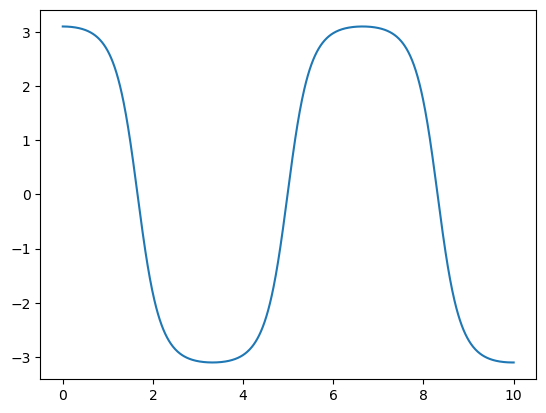

In [96]:
N = 1000
tmax = 10
l = 1.0
g = 10.0
θo = 3.1
ωo = 0.0

t, x = pendulum(N, tmax, l, g, θo, ωo)
plt.plot(t,x)
plt.show()

# raise NotImplementedError()

Now let's write a <i>very</i> simple-minded function to find the time of the second peak. Since the pendulum starts at a peak, this time represents the period of oscillation. 

Since we <i>know</i> that a second peak exists, we can proceed as a Neanderthal. What does a peak mean? If `θ[i]` is a peak (local maximum) then `θ[i]>θ[i-1]` <i>and</i> `θ[i]>θ[i-1]`. If there were noise in this signal, we would have to work much harder. But this clean signal varies smoothly. Since we know a second peak exists, we just have to scroll through all the values of `θ[i]` until this condition is met. Complete the function below to find the location of the second peak after numerically integrating the equations of motion. First, generate the solution. Then use a loop to test the condition in such a way that the loop continues <i>until</i> it obtains the `i` such that `θ[i]>θ[i-1]` <i>and</i> `θ[i]>θ[i-1]`. You might want to look up the `if` statement and logical conditions like `and`, `or`. Personally, I would use a `while` loop. Be <i>careful</i> to make sure your loop actually terminates 

In [97]:
def period(N,tmax,l,g,θo,ωo):
    t = np.linspace(0,tmax,N)
    dt = t[1]-t[0]
    
    θ = np.zeros(N)
    θ[0] = θo
    ω = np.zeros(N)
    ω[0] = ωo
    
    for i in range(0,N-1):
#        pendulum(N,tmax,l,g,θo,ωo)

        F = (-g/l) * np.sin(θ[i])
        ω[i+1] = ω[i] + dt*F
        θ[i+1] = θ[i] + dt*ω[i+1]
        
    for i in range(1,len(θ)-1):
        if θ[i-1] < θ[i] and θ[i] > θ[i+1]:
            return t, i*dt
    
    return 0

    raise NotImplementedError()

Now take $\theta_{0}$ over some range, say $0.1 \leq \theta_{0} \leq 3$, and make a plot of the period $T$ vs. $\theta_{0}$. You can keep $l = 1$, $g = 10$, $\omega_{0} =0$, $N = 1000$ and $t_{max} = 10$ as fixed.

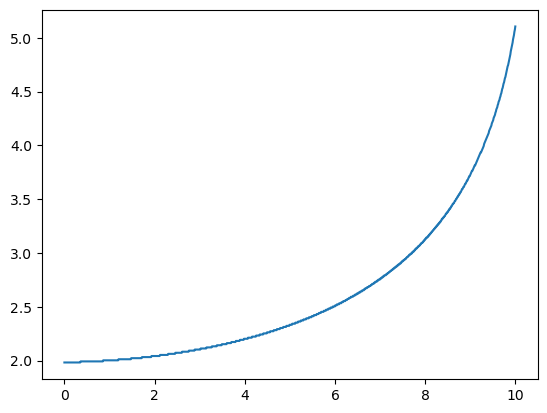

In [98]:
retval = [period(1000,10,1,10,theta,0) for theta in np.linspace(0.1,3,1000)]

t = np.linspace(0,10,1000)
T = list(map(lambda x: x[1], retval))

plt.plot(t,T)
plt.show()

# raise NotImplementedError()

To validate this computation, let's try two things. First, one can show that the exact formula for the period is given by

$$T = 4\sqrt{\frac{l}{g}}\int_{0}^{\frac{\pi}{2}}\frac{du}{\sqrt{1 - \sin^{2}\frac{\theta_{0}}{2}\sin^{2}u}}$$

That's a mess. But it's actually a special form known as an <b>elliptic integral</b> (specifically, the incomplete elliptic integral of the first kind, $F(\phi,m)$ with $\phi = \frac{\pi}{2}$ and $m = \sin^{2}\frac{\theta_{0}}{2}$). 

Complete the function below to perform the integral numerically and return the result. 

In [99]:
def periodint(θo,l,g,N):
    x = np.linspace(1e-10,np.pi/2,N)
    dx = x[1]-x[0]
    f = np.sqrt(1-(np.sin(θo/2)**2) * np.sin(x)**2)**(-1)
    return (4*np.sqrt(l/g)) * sum(f*dx)    

    raise NotImplementedError()

Define an array `T2` and fill its entries with the period calculated from `periodint()`. Plot both `T` and `T2`. Adjust the number of integration steps `N` until the plots are visually identical.

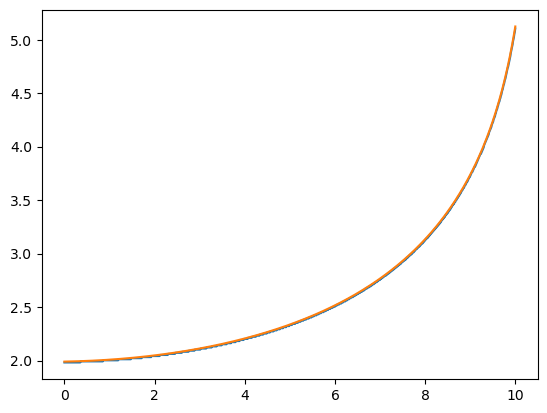

In [100]:
T2 = [periodint(theta,1,10,N) for theta in np.linspace(0.1,3,1000)]
plt.plot(t,T)
plt.plot(t, T2)
plt.show()

# raise NotImplementedError()

In [101]:
'''case1'''
assert np.isclose(T,T2,0.01).all()

The elliptic integral $F(\phi,m)$ can be accessed from the SciPy special function package as `ellipkinc(ϕ,m)`. Check out the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipkinc.html#scipy.special.ellipkinc). In terms of this function, the exact period can be written

$$T = 4\sqrt{\frac{l}{g}}F\left(\frac{\pi}{2},\sin^{2}\frac{\theta_{0}}{2}\right)$$

Define a final array `T3` which uses the elliptic integral function to compute the period.

In [102]:
import scipy.special as sp

T3=[(4*np.sqrt(l/g)) * sp.ellipkinc(np.pi/2, np.sin(theta/2)**2) for theta in np.linspace(0.1,3,1000)]

# raise NotImplementedError()

Now plot all three results on the same axes. If you have taken enough integration steps, you should find excellent agreement.

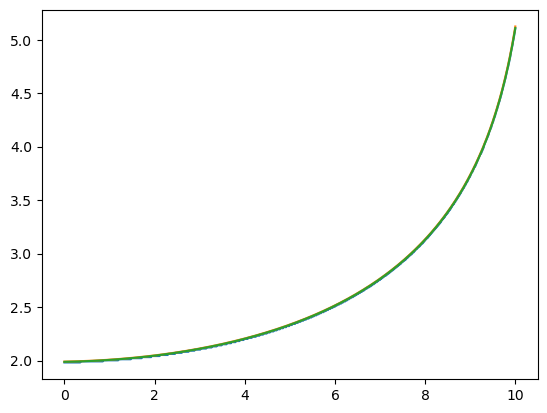

In [103]:
plt.plot(t,T)
plt.plot(t,T2)
plt.plot(t,T3)
plt.show() 

# raise NotImplementedError()

In [104]:
'''case1'''
assert np.isclose(T,T3,0.01).all()

One last consistency check, which is a good trick to have up your sleeve when exact solutions aren't available, is to look at the mechanical energy. We are sure to generate numerical errors in this approximate scheme. But certain algorithms do better at enforcing conservation of energy.

The mechanical energy of a single point particle moving under the influence of near-Earth gravity can be written $E = \frac{1}{2}mv^{2} + mgh$, where the first term is kinetic energy and the second term is the potential energy associated with the gravitational field. We can write the speed of the pendulum bob as $v = \omega l$ and the height as $l(1-\cos\theta)$, so 

$$E = \frac{1}{2}ml^{2}\omega^{2} + mgl(1-\cos\theta)$$

Complete the function below to compute the energy given `θ`, `ω`, `l`, `g`. Since both terms are proportional to mass, you can simply take mass equal to 1. Effectively, you'll be computing energy per unit mass. But if energy is conserved, this will be too.

In [105]:
def energy(θ,ω,l,g):
    return 0.5*m*(l**2)*(ω**2) + m*g*l*(1 - np.cos(θ))
    
    raise NotImplementedError()

Finally, make a plot of energy vs. time. As a first step, modify the program `pendulum()` to return `t`, `θ`, <i>and</i> `ω` so that you can use these arrays in `energy()`. You can take `l = 1`, `g = 10` and some reasonable range for $t$.

In [106]:
def pendulum2(N,tmax,l,g,θo,ωo):
    #user specifies N, tmax, b, xo, vo
    t = np.linspace(0,tmax,N)
    dt = t[1]-t[0]
    
    θ = np.zeros(N)
    θ[0] = θo
    ω = np.zeros(N)
    ω[0] = ωo
    
    for i in range(0,N-1):
        F = (-g/l) * np.sin(θ[i])
        ω[i+1] = ω[i] + dt*F
        θ[i+1] = θ[i] + dt*ω[i+1]
    
    return t, θ, ω
    
    raise NotImplementedError()
    #your last line (written above this line) should be return t,x to get both t and x

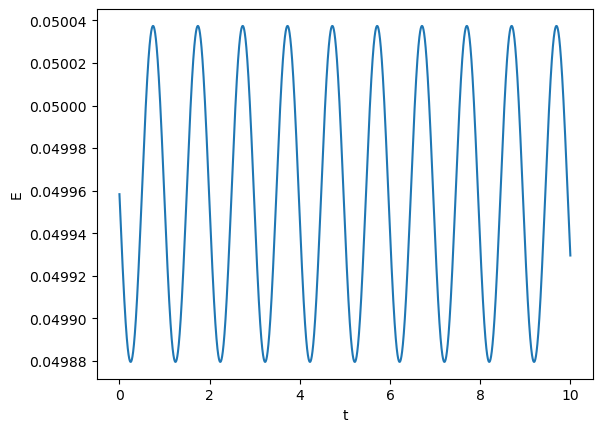

In [107]:
tmax = 10
N = 10000
l = 1
g = 10

θo = .1
ωo = 0
t,θ,ω = pendulum2(N,tmax,l,g,θo,ωo)

E = energy(θ,ω,l,g)
plt.plot(t,E)
plt.xlabel('t')
plt.ylabel('E')
plt.show()

Try varying initial conditions and `N` to get a sense for how well this scheme respects energy conservation. A <i>big</i> thing to look for would be whether the energy blows up over time or remains close to the initial value. The latter is "good."